# Project: Investigate a Dataset - tmdb-movies.csv

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains over 10,000 movies from the Tmdb movie platform, It contains columns like: `cast`,  `budget`, `revenue`, `runtime` and so many other columns that will help in analysing the data


### Question(s) for Analysis
##### Q1 Does higher budget equate higher revenue?
##### Q2: Will movies generate bigger revenues in the future?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline

movies = pd.read_csv('tmdb-movies.csv')
movies.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='wrangling'></a>
## Data Wrangling/cleaning
We have to wrangle the data to pinpoint the necessary cleaning needed.
cleanings could involve of some these:
<ul>
    <li>removing duplicate values</li>
    <li>Changing `release_date` to date-time</li>
    <li>removing rows where `budget_adj` and `revenue_adj`  = 0</li>
    <li>removing columns that are not useful in the analysis</li>


</ul>



In [2]:
# reading the first 5 rows of the dataset
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
movies.shape

(10866, 21)

In [4]:
movies.shape

(10866, 21)

In [5]:
movies.shape

(10866, 21)

some columns are not important for our analysis, the next step is to remove those columns.

In [6]:
# Deleting columns that are not important for my analysis
movies.drop(['id','imdb_id','overview','tagline', 'keywords','homepage', 'production_companies'],axis = 1, inplace = True)

In [7]:
#checking for null values using the .info() function
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


We have to further drop null values from some columns that still have nulls 

In [8]:
movies.dropna(subset = ['genres', 'director','cast'], inplace = True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   release_date    10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
 12  budget_adj      10732 non-null  float64
 13  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [9]:
#changing release_date from object to date-time
movies.release_date = pd.to_datetime(movies['release_date'])

Before I remove rows with 0 values in `budget_adj` and `revenue_adj` I need to use a copy of the movies dataset as this operation will drastically reduce the dataset.

In [10]:
movies[movies['revenue_adj'] != 0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


In [11]:
mv_copy = movies.copy()
#removing the rows with 0 values 
mv_copy = mv_copy[(mv_copy['revenue_adj'] > 0) & (mv_copy['budget_adj'] > 0)]
mv_copy.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
sum(mv_copy['revenue_adj'] == 0)

0

In [13]:
#checking for 0 values
mv_copy[mv_copy['budget_adj'] == 0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [14]:
mv_copy.dropna(subset = ['revenue_adj', 'budget_adj'], inplace = True)

In [15]:
#checking the size of mv_copy dataset
mv_copy.shape

(3850, 14)

<a id='eda'></a>
## Exploratory Data Analysis


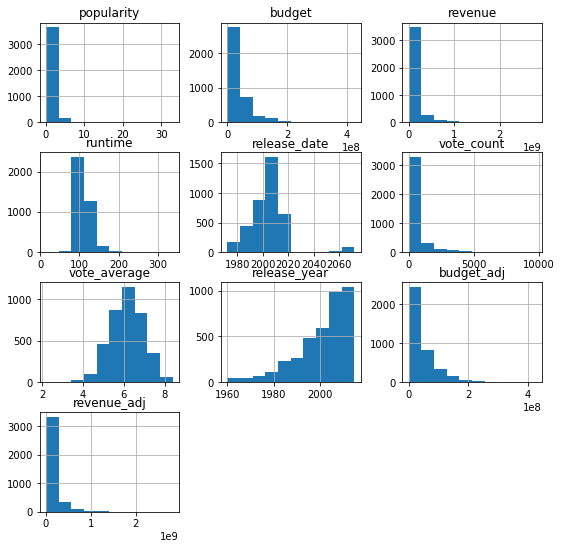

In [16]:
#plotting a histogram for all possible columns
mv_copy.hist(figsize = (9,9));

### Trying to plot a histogram of top 10 directors with the highest number of movies

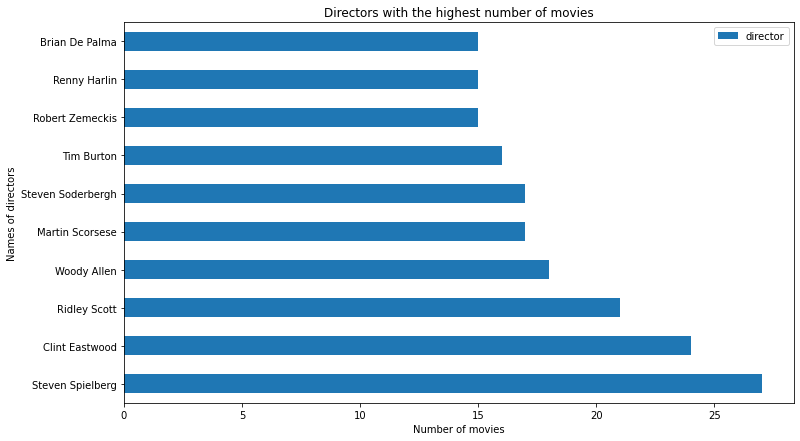

In [17]:
top_dir = mv_copy.director.value_counts().sort_values(ascending = False)
top_10_dir = top_dir[:10]
top_10_dir.plot(kind = 'barh', figsize = (12,7),)
plt.xlabel('Number of movies')
plt.ylabel("Names of directors")
plt.title('Directors with the highest number of movies')
plt.legend();

### Research Question 1: Which Directors generated the highest total revenue?

I used `groupby` to sort out directors according to total revenue and sorted them in descending order of revenue

In [18]:
#grouping top 10 directors according to revenue
best_dir = mv_copy.groupby('director')['revenue_adj'].sum().sort_values(ascending = False)
best_dir10 = best_dir[:10]
best_dir_rest = best_dir[10:]
best_dir10

director
Steven Spielberg     1.520245e+10
James Cameron        7.327221e+09
Peter Jackson        7.019848e+09
George Lucas         6.313919e+09
Robert Zemeckis      5.655648e+09
Michael Bay          5.460672e+09
Chris Columbus       4.893486e+09
Tim Burton           4.529285e+09
David Yates          4.177455e+09
Christopher Nolan    4.164262e+09
Name: revenue_adj, dtype: float64

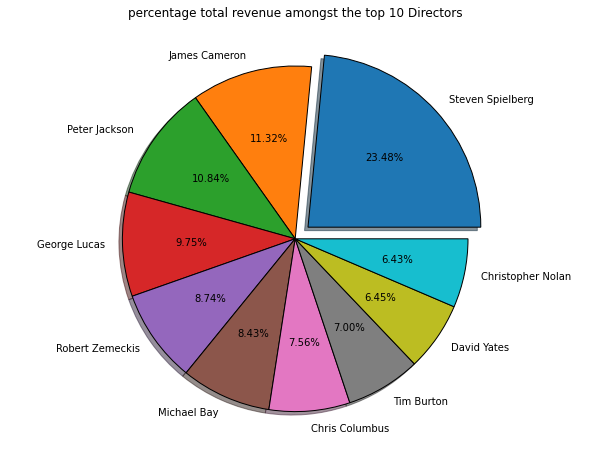

In [19]:
#piechart of top 5 directors by total revenue generated
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
directors = ['Steven Spielberg ', 'James Cameron', 'Peter Jackson  ', 'George Lucas', 'Robert Zemeckis','Michael Bay', 'Chris Columbus ', 'Tim Burton','David Yates', 'Christopher Nolan']
exp = [0.1,0,0,0,0,0,0,0,0,0]
revenue = best_dir10
ax.pie(revenue, labels = directors,autopct='%1.2f%%', explode = exp, wedgeprops = {'edgecolor' : 'black'}, shadow = True)
plt.title("percentage total revenue amongst the top 10 Directors")
plt.show()

### Research Question 2: What percentage of the total revenue was generated from top to directors?

In [20]:
best_dir10_sum = best_dir10.sum()
best_dir_rest_sum = best_dir_rest.sum()
#making sure adding first 10 and the rest == total bet_dir series
assert best_dir10_sum + best_dir_rest_sum == best_dir.sum()

# getting the value of both in a list
best_dir_both = np.array([best_dir10_sum,best_dir_rest_sum])
best_dir_both


array([6.47442433e+10, 4.63460069e+11])

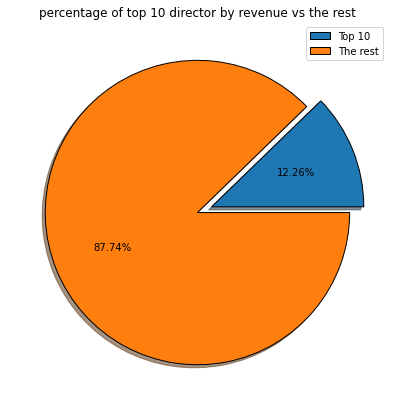

In [21]:
#finding what percentage revenue of the entire dataset does the top 10 directors produce
fig = plt.figure(figsize = (7,7))
label = ['Top 10', 'The rest']
exp = [0.1,0]
plt.pie(best_dir_both, wedgeprops = {'edgecolor': 'black'}, explode = exp, shadow = True, autopct='%1.2f%%')
plt.title('percentage of top 10 director by revenue vs the rest')
plt.legend(label);

### Research Question 3: Does higher budget result in higher revenue?

We shall first plot budget against revenue to see if we can get a clear relationship

In [22]:
mv_copy.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


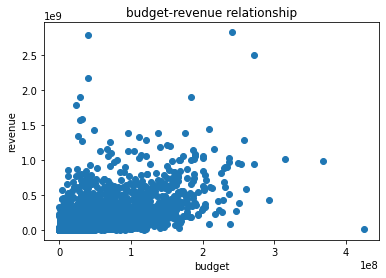

In [23]:
#budget/revenue relationship
plt.scatter(mv_copy['budget_adj'],mv_copy['revenue_adj'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('budget-revenue relationship');

from the above scatter plot we can see that revenue increases with an increase in budget in as much as there are a few outliers, we can explore more on the data using a bar chat

In [24]:
#using the mean of budget to divide budget into 2: High budget and low budget
b_mean = mv_copy['budget_adj'].mean()
b_mean
high_budget = mv_copy[mv_copy['budget_adj'] >= b_mean]
low_budget = mv_copy.query('{} > budget_adj'.format(b_mean))
high_budg_rev = high_budget['revenue_adj'].mean()
low_budg_rev = low_budget['revenue_adj'].mean()

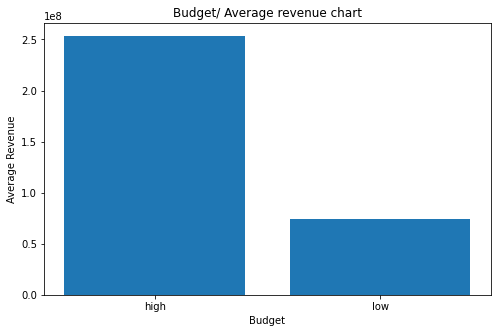

In [25]:
#plotting the barchart
fig = plt.figure(figsize= (8,5))
plt.bar( [1,2],[high_budg_rev,low_budg_rev], tick_label = ['high','low'])
plt.xlabel('Budget')
plt.ylabel('Average Revenue')
plt.title('Budget/ Average revenue chart');

### Research Question 4: Will movies generate bigger revenues in the future?

To investigate this, we have to see how revenue has peformed over the years. To ensure fairness we shall use the`revenue_adj` column to adjust for inflation.

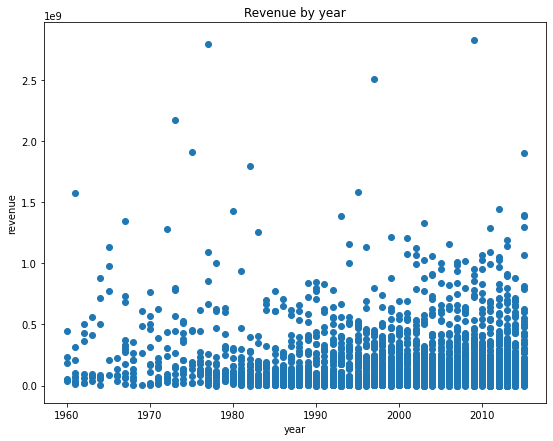

In [26]:
# plotting a scatter plot of year against revenue_adj
plt.figure(figsize = (9,7))
plt.scatter(mv_copy['release_year'], mv_copy['revenue_adj'])
plt.xlabel('year')
plt.ylabel('revenue')
plt.title('Revenue by year');

From the above graph we cannot see any trend in the relationship.
To get a clearer understanding we shall divide the year column into three and plot them against the mean of `revenue_adj`

In [27]:
# calculating the 25%, 50% and 75% of release_year

# 25% of release_year
n = int(25)
n = n/100
a = mv_copy['release_year'].quantile(n)

# 50% (median)
n = int(50)
n = n/100
b = mv_copy['release_year'].quantile(n)

# 75% of release_year
n = int(75)
n = n/100
c = mv_copy['release_year'].quantile(n)
c


2010.0

In [28]:
#to confirm my work, 75% is still 2010
mv_copy.release_year.describe()

count    3850.000000
mean     2001.260519
std        11.285056
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

In [29]:
#establishing the 3 groups for release_year
low_yr = mv_copy[mv_copy['release_year']<= a]
mid_yr = mv_copy[(mv_copy['release_year']> a) & (mv_copy['release_year']<= b)]
high_yr = mv_copy[(mv_copy['release_year']> b)]

In [30]:
# we can now subset low_yr, mid_yr, and high_yr with revenue_adj and get the mean
low_yr_rev = low_yr['revenue_adj'].mean()
mid_yr_rev = mid_yr['revenue_adj'].mean()
high_yr_rev = high_yr['revenue_adj'].mean()
high_yr_rev

123745341.94474295

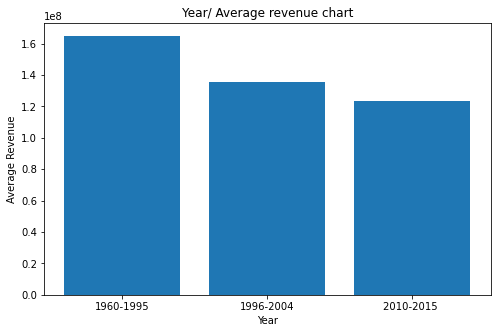

In [31]:
# plot a bar chart 
fig = plt.figure(figsize= (8,5))
label = ['1960-1995', '1996-2004', '2010-2015 ']
plt.bar( [1,2,3],[low_yr_rev, mid_yr_rev, high_yr_rev], tick_label = label)
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Year/ Average revenue chart');